In [1]:
import networkx as nx

In [2]:
G = nx.erdos_renyi_graph(10, 0.5)
G

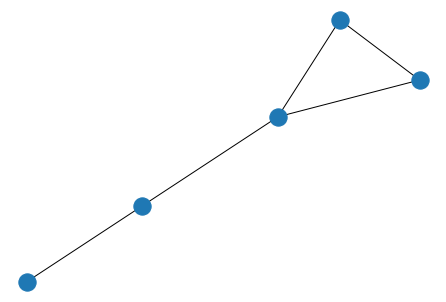

In [3]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(4, 5)

nx.draw(G)

In [4]:
"""
For every edge, calculate pair of degree of adjacent nodes
"""

# node_degree_xy
# basically return pairwise nodes' degree
node_degree_xy = []

nodes = set(G)
xdeg = G.degree
ydeg = G.degree

# for (node, degree(node))
for u, degu in xdeg(nodes):
    # list of neighbors in set of nodes
    neighbors = (nbr for _, nbr in G.edges(u) if nbr in nodes)
    # print(u, degu, list(neighbors))
    # print(ydeg(neighbors))

    # for (neighbor(node), degree(neighbor(node)))
    for v, degv in ydeg(neighbors):
        node_degree_xy.append([degu, degv])
        # print(u, degu, list(neighbors), v)

node_degree_xy


# mixing_dict. Create mixing matrix
# dict map(deg_x: deg_y: count of pairs)
d = {}
psum = 0.0
for x, y in node_degree_xy:
    # if first time encounter
    if x not in d:
        d[x] = {}
    if y not in d:
        d[y] = {}

    # get current count
    v = d[x].get(y, 0)
    d[x][y] = v + 1
    
    # count of pairs
    psum += 1

# normalised
for k, jdict in d.items():
    for j in jdict:
        jdict[j] /= psum

"""
DEGREE MIXING MATRIX
calculate how many pairs are found
convert degree mixing dict to matrix
"""
from networkx.utils import dict_to_numpy_array
s = set(d.keys())
for k, v in d.items():
    s.update(v.keys())
m = max(s)
mapping = {x: x for x in range(m+1)}
M = dict_to_numpy_array(d, mapping=mapping)
# M = M/ M.sum()
M

"""
NUMERIC ASSORTATIVITY COEFFICIENT
summarise the degree mixing matrix to numeric assortativity
"""
import numpy as np

_nx, _ny = M.shape
x = np.arange(_nx)
y = np.arange(_ny)
a = M.sum(axis=0)
b = M.sum(axis=1)

vara = (a * x ** 2).sum() - ((a * x).sum()) ** 2
varb = (b * x ** 2).sum() - ((b * x).sum()) ** 2

xy = np.outer(x, y)
ab = np.outer(a, b)

coeff = (xy * (M - ab)).sum() / np.sqrt(vara * varb)
coeff

-0.11111111111111355

In [32]:
M * psum

array([[0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 2., 3.],
       [0., 0., 3., 0.]])

In [22]:
x, y, xy

(array([0, 1, 2, 3]),
 array([0, 1, 2, 3]),
 array([[0, 0, 0, 0],
        [0, 1, 2, 3],
        [0, 2, 4, 6],
        [0, 3, 6, 9]]))

In [14]:
a

array([0. , 0.1, 0.6, 0.3])

In [5]:
nx.algorithms.assortativity.degree_mixing_matrix(G)

array([[0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0. ],
       [0. , 0.1, 0.2, 0.3],
       [0. , 0. , 0.3, 0. ]])

In [6]:
nx.algorithms.assortativity.degree_assortativity_coefficient(G)

-0.11111111111111355